# Credit Risk Classifier: Cornerstone of Mordern Banking

# Business Understanding

Credit risk has become a invaluable tool in the mordern banking industry. Credit risk classifiers serve as a building block for informed decision-making and optimized financial management.

Credit risk classifier models, if set up correctly, can improve a banks strategic goals and be more effective and may result in satisfying the triple bottom line. TBL can be improve in the following aspects:

1. People 

    - Financial incluesion will increase becasue the classifier has identified loan worth customers and in-turn the bank can expand it loan portfolio and include more minorities

    - Community Development: By identifying loan worth consumers that will utlilze the funds to their betterment will result to a chain reaction of growth in the community

2. Planet - Corporate Social Responisbility can be conduct in the a more frequnetl and larger scale due to the decrease in losses from deliquent customers.

3. Profit - Financial stability is mandatory and essential for the ensurance of longevity. Banks ensure longevity using risk management techniques such as credit risk classifiers        

# Business Problem

Equity Bank, a leading financial institution in East Africa. Equity Bank wants to expand it loan portfolio without negatively affecting its TBL. However reports for the year 2023 showed a increase in loan deafults and non-performing loans. Equity's stakeholders require a system to predict the credit risk consumers precisely and accurately

# Main Objective

Implement a credit risk classification system to improve loan approval decisions. The following outcome will be expected from this classifer will be the following: 

    1. reducing non-performing loan ration

    2. increase portfolio growth

    3. enhance operational efficiceny

In [263]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report



In [97]:

data = pd.read_csv('credit_risk_dataset.csv')
data = pd.DataFrame(data)
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# Data Understanding

**Personal Information:**

person_age: This column likely represents the borrower's age in years. It can be a factor in assessing creditworthiness as younger individuals might have a shorter credit history and potentially less stable income.

person_income: This column indicates the borrower's annual income. Income is a crucial factor in determining loan eligibility and the borrower's ability to repay.

person_home_ownership: This column specifies whether the borrower owns their home (e.g., "RENT", "MORTGAGE", "OWN"). Homeownership can be a positive indicator of financial stability and responsibility.

person_emp_length: This column represents the borrower's employment length (e.g., in years). Stable employment demonstrates a consistent income source, which is essential for loan repayment.

**Loan Information:**

loan_intent: This column likely indicates the borrower's purpose for taking the loan (e.g., "debt_consolidation", "home_improvement"). The purpose can influence the risk assessment as some loan purposes might be deemed riskier than others.

loan_grade: This column represents the credit rating assigned to the loan by the lender. It reflects the perceived risk associated with the loan based on the borrower's creditworthiness.

loan_amnt: This column specifies the loan amount requested by the borrower. Higher loan amounts generally translate to higher risk for the lender.

loan_int_rate: This column indicates the interest rate charged on the loan. The interest rate is often determined by the borrower's creditworthiness and the loan grade.

**Loan Status and Repayment History:**

loan_status: This column likely indicates the current status of the loan (e.g., "current", "late", "charged_off"). It reflects the borrower's repayment behavior and their ability to meet their loan obligations.

loan_percent_income: This column represents the loan amount as a percentage of the borrower's income. A high loan-to-income ratio indicates a larger 
financial burden on the borrower and potentially higher risk of default.

**Credit Bureau Information:**

cb_person_default_on_file: This column likely indicates whether the borrower has any past loan defaults recorded in their credit bureau report (e.g., "Yes", "No"). A history of defaults suggests a higher risk of future defaults.

cb_person_cred_hist_length: This column represents the length of the borrower's credit history (e.g., in years). A longer credit history allows for a more comprehensive assessment of the borrower's repayment behavior.

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [99]:
null_num = []

for i in data.columns:
    x = data[i].isnull().sum()
    null_num.append(x)

null_num_pd = pd.DataFrame(null_num,columns=['Total Missing Values'],index=data.columns)
null_num_pd.sort_values(by='Total Missing Values',ascending=False)

,Total Missing Values
loan_int_rate,3116
person_emp_length,895
person_age,0
person_income,0
person_home_ownership,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_status,0
loan_percent_income,0


# How to deal with missing values

- When presented with missing values the following steps should followed before dropping or replacing the missing values, with mean or mode, check the following characteristics of the variable:

1. Analyze the distribution of the variable (loan_int)

- Once, the distribution has be identified then undertke the following steps: 

    1. If the distribution is normal then replace with **mean** is a viable option

    2. If the distribution is skewed then replace with median. Median is a good option due to the fact its not as sensitive to outliers as compared to mode or mean

In [100]:
# Deal with the missing values
# Find the average loan int rate
print(data['loan_int_rate'].mean())
print(data['loan_int_rate'].mode())

11.011694892245036
0    7.51
Name: loan_int_rate, dtype: float64


# Feature Engineering

In [101]:
# Change column type to int8 for column: 'loan_status'
data = data.astype({'loan_status': 'int8'})

In [102]:
data["debt_to_income_ratio"] = (data["loan_amnt"] / data["person_income"]*100)
data.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,debt_to_income_ratio
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,59.322034
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,10.416667
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,57.291667
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,53.435115
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,64.338235


In [103]:
defaulted_loans  = data[data['loan_status']==1]
defaulted_loans.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,debt_to_income_ratio
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,59.322034
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,57.291667
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,53.435115
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,64.338235
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,25.252525


In [104]:
total_defaulted_loans = defaulted_loans['loan_amnt'].sum()
print(f"The total amount of money defaulted is ${total_defaulted_loans}")

The total amount of money defaulted is $77125375


In [105]:
total_loan_amnts = data['loan_amnt'].sum()
print(f"The total amount of money disbursed is ${total_loan_amnts}")

The total amount of money disbursed is $312431300


In [106]:
# Calculate the LGD
LGD = (total_defaulted_loans/total_loan_amnts)*100
LGD

24.685546870624037

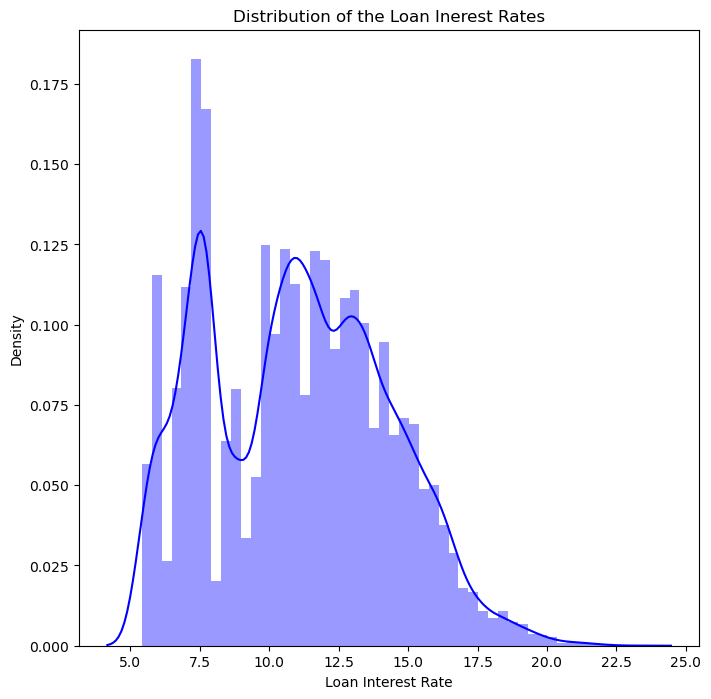

In [107]:
#Plot the histrogram
plt.figure(figsize=(8,8))
sns.distplot(data['loan_int_rate'],color='r')
plt.xlabel('Loan Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of the Loan Inerest Rates')
plt.show()

## Findings

The data is skewed to the left, therefore the best options is using the median measure of central tendacy

In [108]:
# Replace missing values with the median of each column in: 'loan_int_rate'
data = data.fillna({'loan_int_rate': data['loan_int_rate'].median()})
# Check the missing values
null_num = []

for i in data.columns:
    x = data[i].isnull().sum()
    null_num.append(x)

null_num_pd = pd.DataFrame(null_num,columns=['Total Missing Values'],index=data.columns)
null_num_pd.sort_values(by='Total Missing Values',ascending=False)


,Total Missing Values
person_emp_length,895
person_age,0
person_income,0
person_home_ownership,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


**The missing values in the person_emp_length amount to 895 out of 32581 which is only 2.74699% of the dataset therefore dropping the values wont affect the analysis.**

In [109]:
# Drop missing values
data = data.dropna(subset='person_emp_length')

null_num = []

for i in data.columns:
    x = data[i].isnull().sum()
    null_num.append(x)

null_num_pd = pd.DataFrame(null_num,columns=['Total Missing Values'],index=data.columns)
null_num_pd.sort_values(by='Total Missing Values',ascending=False)

,Total Missing Values
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


# Exploratory Data Analysis

In [110]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,debt_to_income_ratio
count,31686.000000,3.168600e+04,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000
mean,27.747302,6.669188e+04,4.789686,9661.337815,11.035070,0.215426,0.169612,5.809316,16.997111
std,6.360283,6.242729e+04,4.142630,6336.226458,3.070152,0.411124,0.106297,4.060867,10.657377
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.078947
25%,23.000000,3.939700e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000,8.928890
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000,14.711538
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.160000,0.000000,0.230000,8.000000,22.855510
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000,83.000000


## Dealing with Outliers

In [111]:
palette = sns.set_palette("Reds")

Text(0, 0.5, 'Count')

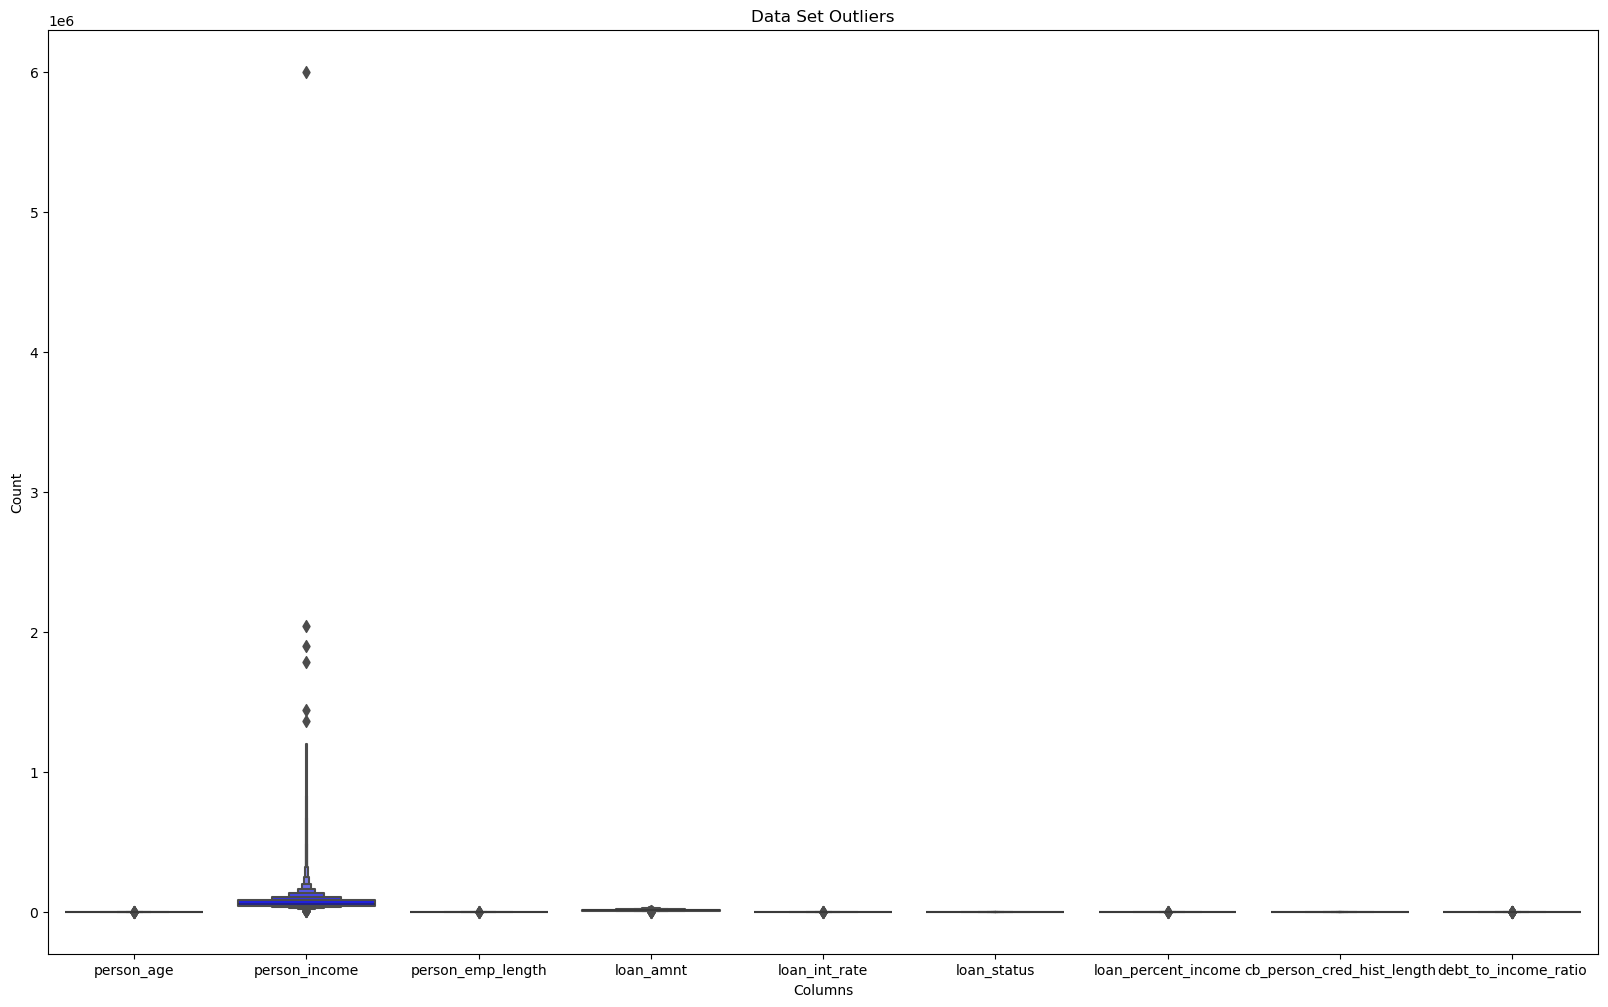

In [112]:
plt.figure(figsize=(20,12))
sns.boxenplot(data, color='r')
plt.title('Data Set Outliers')
plt.xlabel('Columns')
plt.ylabel('Count')

#### The max years of employment in the person_emp_length is 123 years which indicates data entry error

In [113]:
data = data[data.person_emp_length < 40]
data


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,debt_to_income_ratio
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,10.416667
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,57.291667
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,53.435115
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,64.338235
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,25.252525
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,10.943396
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,14.687500
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,46.052632
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,10.000000


In [114]:
data['person_emp_length'].sort_values(ascending=False)

32515    38.0
32428    34.0
30914    31.0
31867    31.0
31866    31.0
         ... 
4133      0.0
29342     0.0
16957     0.0
8703      0.0
1778      0.0
Name: person_emp_length, Length: 31683, dtype: float64

Text(0, 0.5, 'Count')

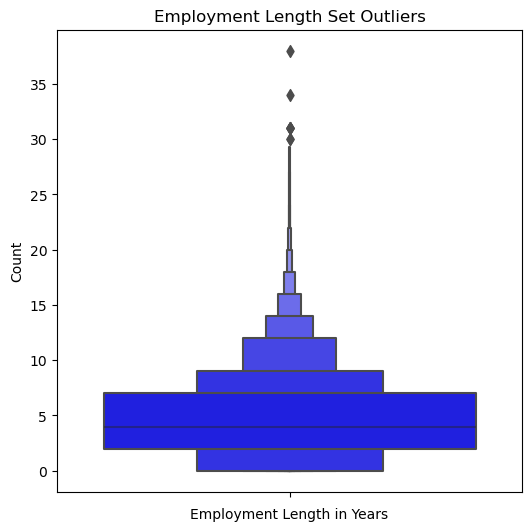

In [115]:
plt.figure(figsize=(6,6))
sns.boxenplot(y='person_emp_length',data=data, color='r')
plt.title('Employment Length Set Outliers')
plt.xlabel('Employment Length in Years')
plt.ylabel('Count')

### Analyze the Person Age Variable


**The max age is 144 years old which is very unlikly, look for other outliers. Using seaborn's boxplot find the general area where outliers are situated in the dataset. The area of concern is in the person_age column. The values of interest are from 80 to 144. In order to be more precise select the person_age column and reorder in descending order**

In [116]:
# Find the threshold for the outlier
data['person_age'].sort_values(ascending=False).head(10)

183      144
32297    144
81       144
575      123
747      123
32416     94
32506     84
32422     80
32534     76
32381     73
Name: person_age, dtype: int64

**Using the IQR range with Q3 being the 95 percentile remove the outliers that lay above the 95th perecentile.**

Text(0, 0.5, 'Persons Age')

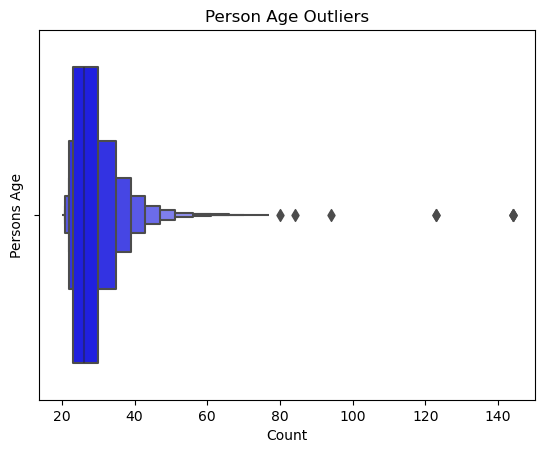

In [117]:
sns.boxenplot(x='person_age',data=data,color='r')
plt.title('Person Age Outliers')
plt.xlabel('Count')
plt.ylabel('Persons Age')

In [118]:
data = data[data.person_age < 60]
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,debt_to_income_ratio
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,10.416667
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,57.291667
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,53.435115
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,64.338235
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,25.252525


Text(0, 0.5, 'Outlier')

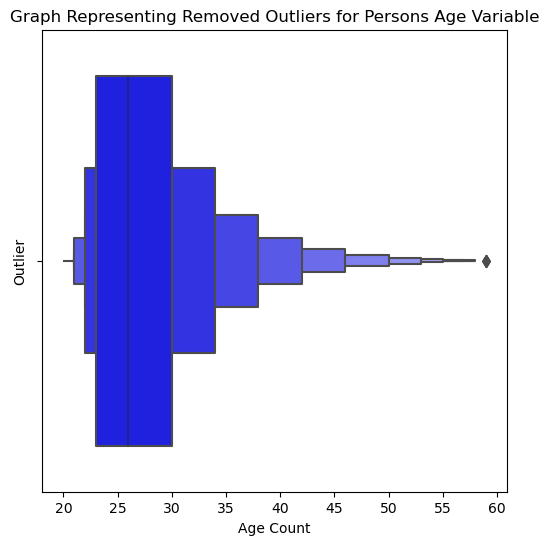

In [119]:
plt.figure(figsize=(6,6))
sns.boxenplot(x='person_age',data=data,color='r')
plt.title('Graph Representing Removed Outliers for Persons Age Variable')
plt.xlabel('Age Count')
plt.ylabel('Outlier')

**Justification**

In Credit banking the capacity to pay is a fundamental critiria for lenders. When an individual passes a certain age usually the age after retirement their capacity will decrease. Individuals older than 94 will be impractical. The probability of a person working for 123 years is very small.

In [120]:
filtered_data = data
filtered_data.shape

(31600, 13)

# Univariate Analysis

**Create a Graph showing the distribution on Employment Length**

Text(0, 0.5, 'Frequency')

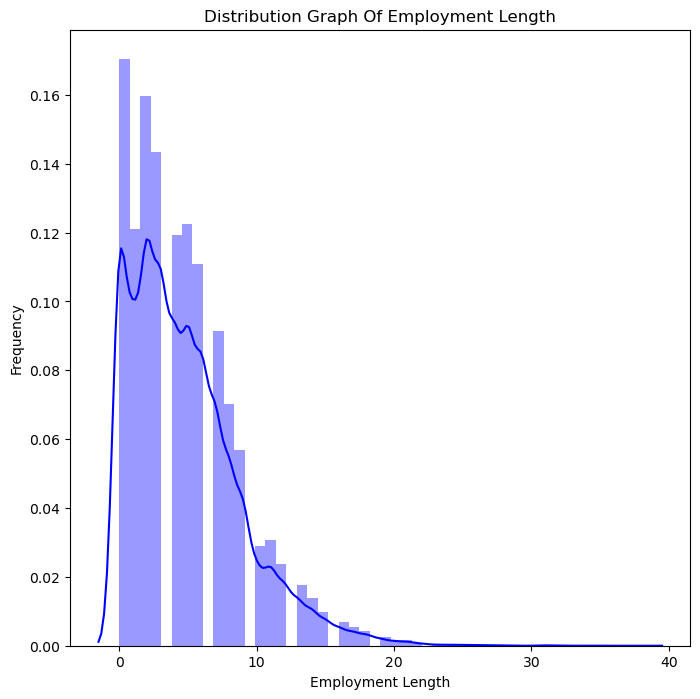

In [121]:
# Find the distribution of the Employment Length
plt.figure(figsize=(8,8))
sns.distplot(filtered_data['person_emp_length'],color='r')
plt.title('Distribution Graph Of Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Frequency')

**Analyze the Person Age**

Text(0, 0.5, 'Frequency')

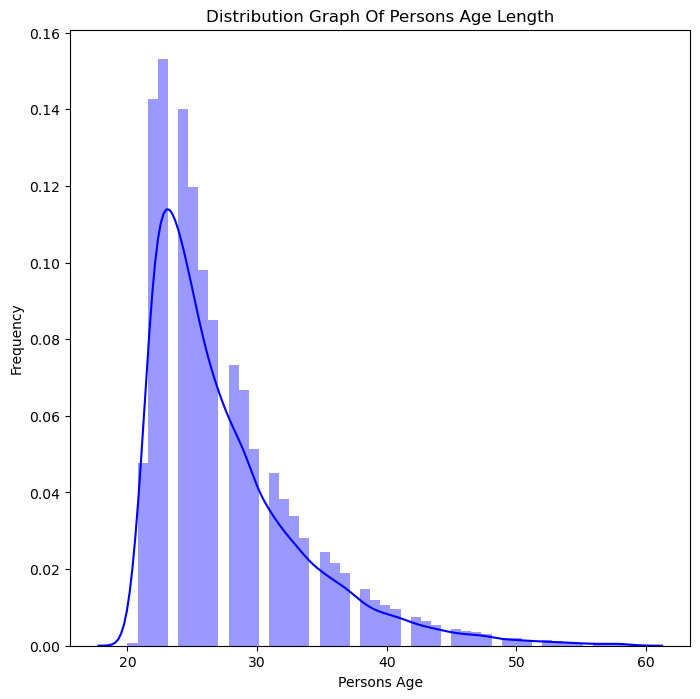

In [122]:
# Find the distribution of the Employment Length
plt.figure(figsize=(8,8))
sns.distplot(filtered_data['person_age'],color='r')
plt.title('Distribution Graph Of Persons Age Length')
plt.xlabel('Persons Age')
plt.ylabel('Frequency')

**Analyze the Persons Income**

In [123]:
value_count_income = filtered_data['person_income'].value_counts()
sorted_income = filtered_data['person_income'].sort_values(ascending=False)
sorted_income.mean()

66366.77655063292

In [124]:
bins_persons_age = [20,30,40,50,60,74]

labels_persons_age = ['20s','30s','40s','50s','60s and above']

ages = pd.Series(filtered_data['person_age'])

filtered_data['Age Group'] = pd.cut(ages, bins=bins_persons_age,labels=labels_persons_age)


In [125]:
person_age_group = filtered_data.groupby(['Age Group']).agg(Count=('Age Group', 'count')).reset_index()
person_age_group

,Age Group,Count
0,20s,24108
1,30s,6101
2,40s,1176
3,50s,200
4,60s and above,0


**Analyze the Loan Intent Variable**

In [126]:
# Performed 1 aggregation grouped on column: 'loan_intent'
loan_intent_group = filtered_data.groupby(['loan_intent']).agg(loan_intent_count=('loan_intent', 'count')).reset_index()
loan_intent_group.sort_values(by='loan_intent_count',ascending=False)

,loan_intent,loan_intent_count
1,EDUCATION,6281
3,MEDICAL,5874
5,VENTURE,5550
4,PERSONAL,5334
0,DEBTCONSOLIDATION,5055
2,HOMEIMPROVEMENT,3506


Text(0, 0.5, 'Counts')

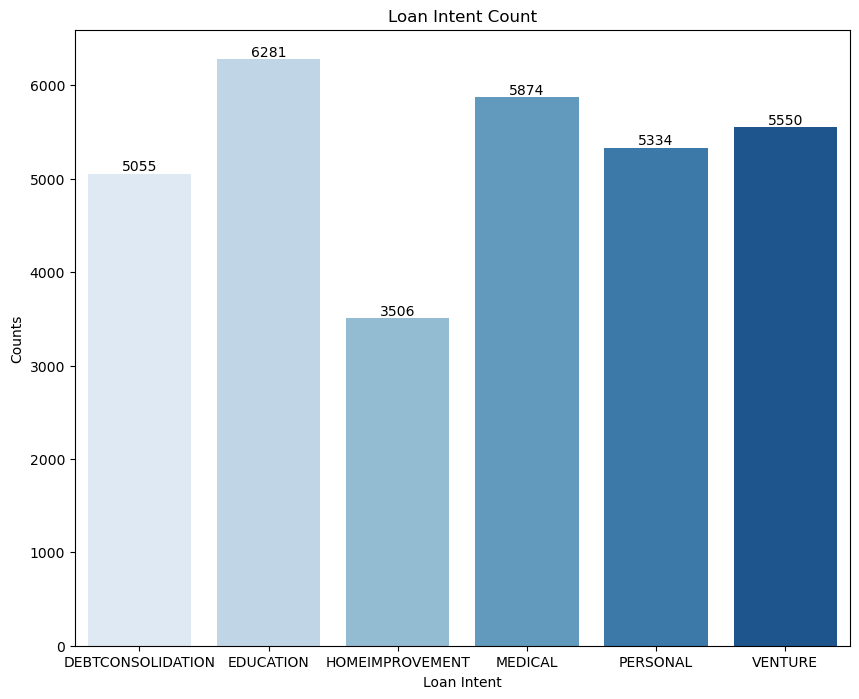

In [127]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x=loan_intent_group['loan_intent'],y=loan_intent_group['loan_intent_count'],palette=palette)
ax.bar_label(ax.containers[0]) 
plt.title("Loan Intent Count")
plt.xlabel('Loan Intent')
plt.ylabel('Counts')

**Analyze the Home Ownership Variable**

In [128]:
# Performed 1 aggregation grouped on column: 'person_home_ownership'
home_improve_group = filtered_data.groupby(['person_home_ownership']).agg(person_home_ownership_count=('person_home_ownership', 'count')).reset_index()
home_improve_group = home_improve_group.sort_values(by='person_home_ownership_count',ascending=False)

Text(0, 0.5, 'Counts')

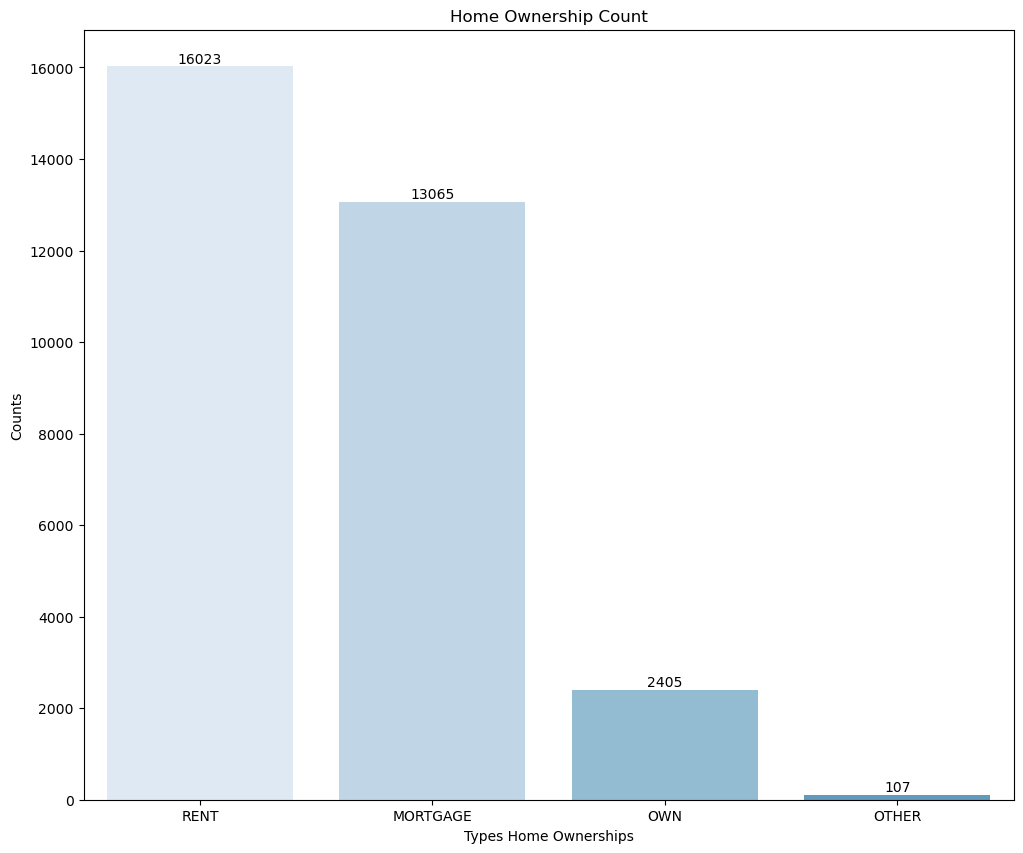

In [129]:
plt.figure(figsize=(12,10))
ax = sns.barplot(x='person_home_ownership',y='person_home_ownership_count',data=home_improve_group,palette=palette)
ax.bar_label(ax.containers[0]) 
plt.title("Home Ownership Count")
plt.xlabel('Types Home Ownerships')
plt.ylabel('Counts')

**Analyse the loan percent income variable**

- A good loan percernt income is 36% - 43%

- An ideal loan percent income is 35% and below

- A poor loan percent income is 44% and above

<Axes: ylabel='count'>

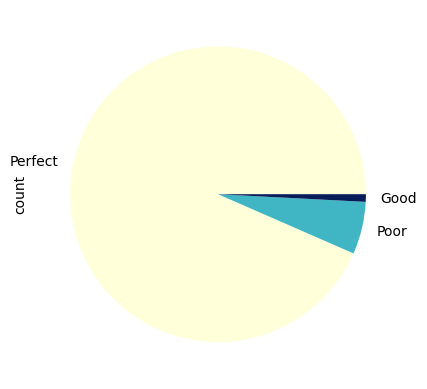

In [130]:
# Create Bins for the loan percent income
bins = [0,0.35,0.36,1]

labels  = ['Perfect','Good','Poor']

filtered_data['loan_percent_income_category'] = pd.cut(filtered_data['loan_percent_income'], bins=bins,labels=labels)


filtered_data['loan_percent_income_category'].value_counts().plot(kind='pie',colormap='YlGnBu')

In [131]:
# Performed 1 aggregation grouped on column: 'loan_status'
status_classified = filtered_data.groupby(['loan_status']).agg(loan_amnt_sum=('loan_amnt', 'sum')).reset_index()
status_classified = status_classified.rename(columns={'loan_amnt_sum': 'Total Sum'})
status_classified = status_classified.rename(columns={'loan_status': 'Loan Status'})
status_classified

,Loan Status,Total Sum
0,0,230265000
1,1,74797725


In [132]:
default =  status_classified['Total Sum'].loc[0]

non_default =  status_classified['Total Sum'].loc[1]


bottom = (status_classified['Total Sum'].loc[1] + status_classified['Total Sum'].loc[0])

loans_not_paid = round((default/bottom)*100)

loans_paid = round((non_default/bottom)*100)

print(f"Perecentage of loans Not Paid: {loans_not_paid}%")

print(f"Perecentage of loans Paid: {loans_paid}%")


Perecentage of loans Not Paid: 75%
Perecentage of loans Paid: 25%


<Axes: ylabel='Frequency'>

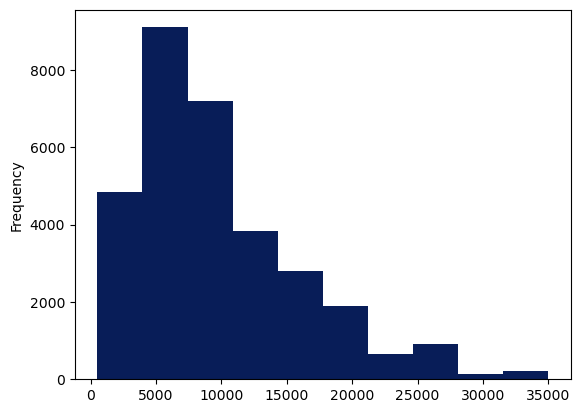

In [133]:
filtered_data['loan_amnt'].plot(kind='hist',colormap='r')

In [134]:
# Analyze the Relationship between Loan Grade and Loan Intent
loan_intent_grade = filtered_data.groupby(['Age Group']).agg(loan_grade_first=('loan_grade','first')).reset_index()
loan_intent_grade = pd.DataFrame(data=loan_intent_grade,columns=loan_intent_grade.columns)

# Bi-variate Analysis

In [135]:
filtered_data_copy = filtered_data.copy()
filtered_data_copy

# Change column type to string for column: 'loan_status'
filtered_data_copy = filtered_data_copy.astype({'loan_status': 'string'})

# Replace all instances of "0" with "Unpaid" in column: 'loan_status'
filtered_data_copy['loan_status'] = filtered_data_copy['loan_status'].str.replace("0", "Unpaid", case=False, regex=False)

# Replace all instances of "0" with "Unpaid" in column: 'loan_status'
filtered_data_copy['loan_status'] = filtered_data_copy['loan_status'].str.replace("1", "Paid", case=False, regex=False)

Text(0, 0.5, 'Employment Lenght Count')

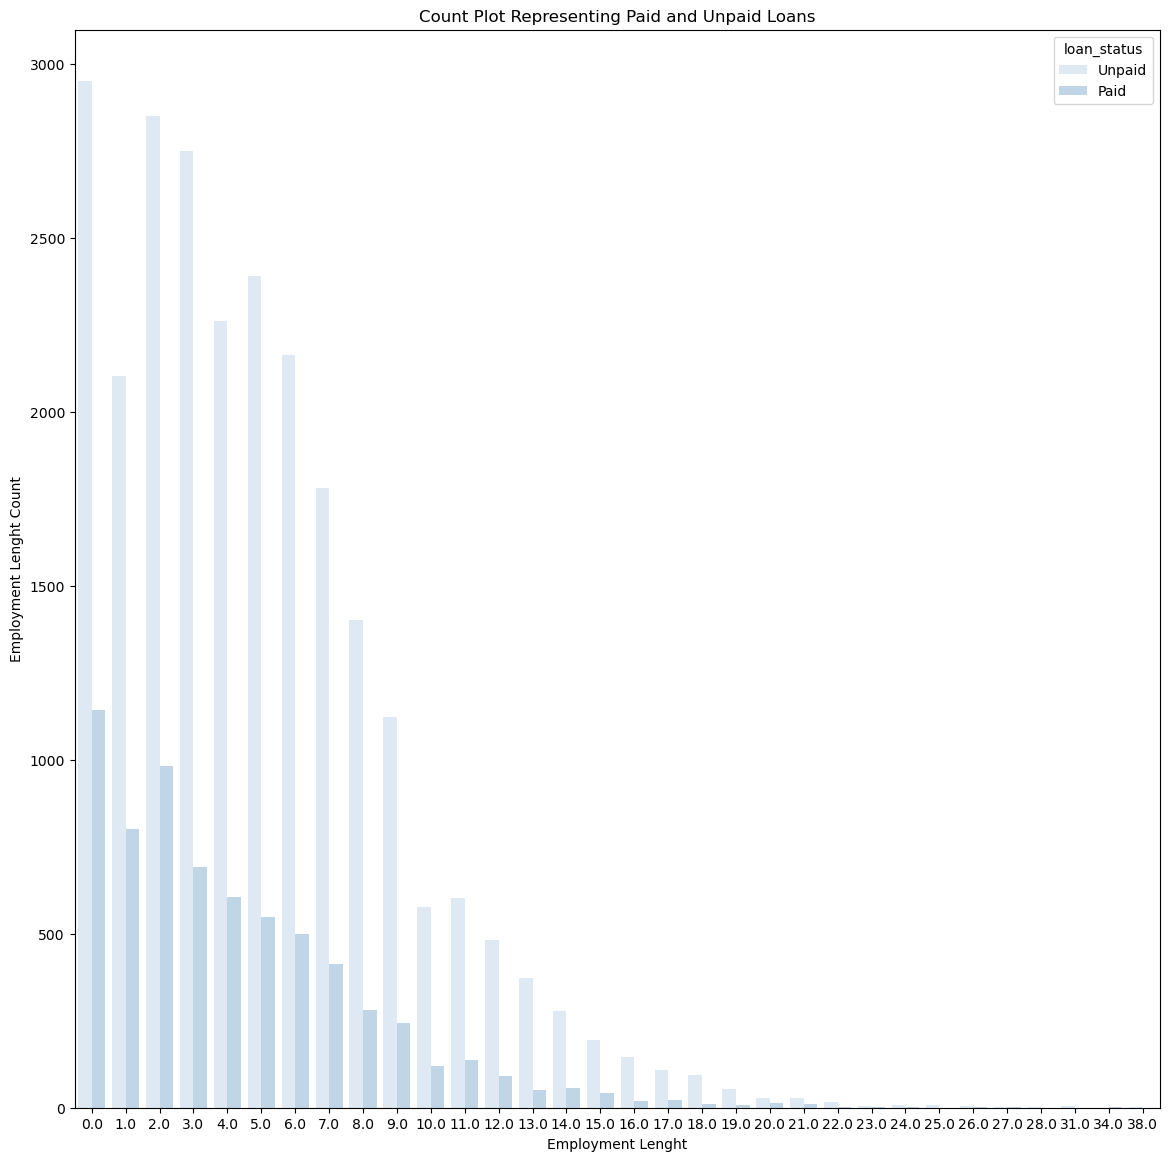

In [160]:
plt.figure(figsize=(14,14))
sns.countplot(x='person_emp_length',data=filtered_data_copy,hue='loan_status',palette=palette)
plt.title("Count Plot Representing Paid and Unpaid Loans")
plt.xlabel("Employment Lenght")
plt.ylabel("Employment Lenght Count")

Text(0, 0.5, 'Persons Age Count')

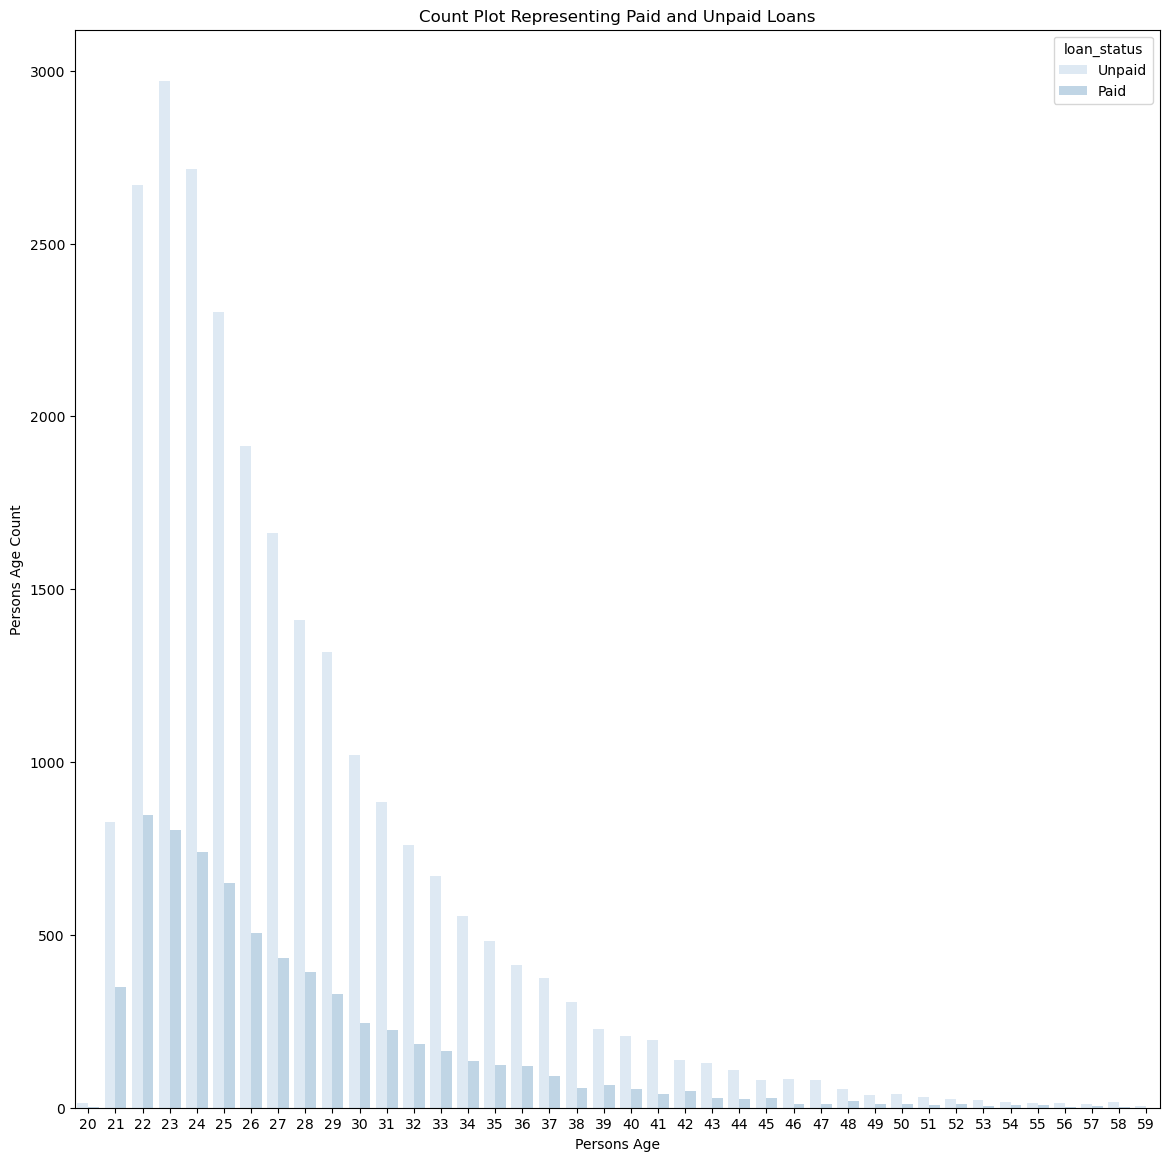

In [161]:
plt.figure(figsize=(14,14))
sns.countplot(x='person_age',data=filtered_data_copy,hue='loan_status',palette=palette)
plt.title("Count Plot Representing Paid and Unpaid Loans")
plt.xlabel("Persons Age")
plt.ylabel("Persons Age Count")

Text(0, 0.5, 'Borrowers Credit History Count')

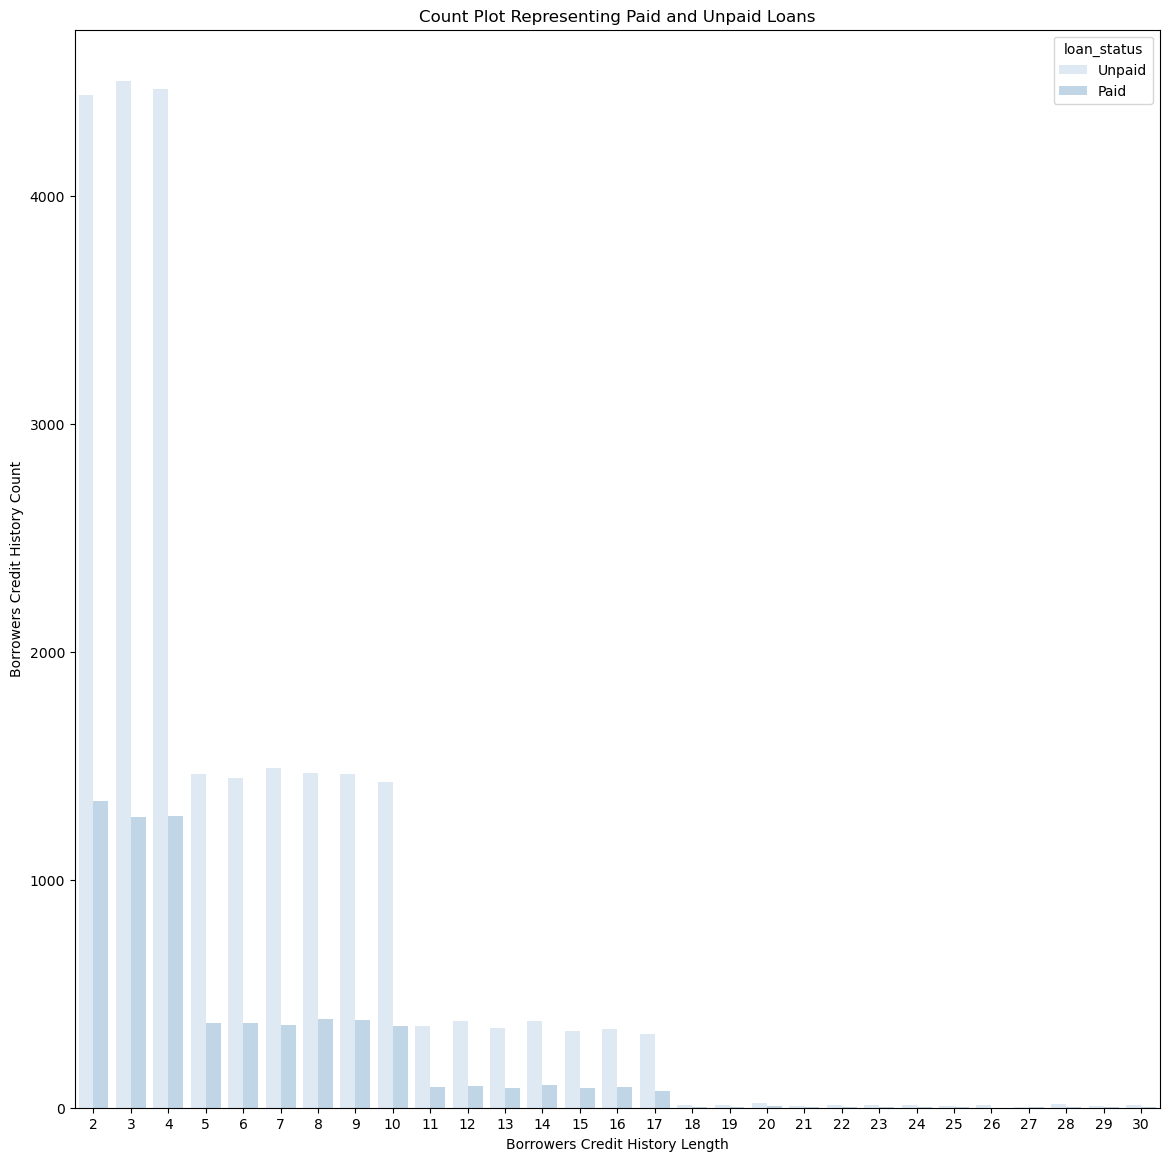

In [162]:
plt.figure(figsize=(14,14))
sns.countplot(x='cb_person_cred_hist_length',data=filtered_data_copy,hue='loan_status',palette=palette)
plt.title("Count Plot Representing Paid and Unpaid Loans")
plt.xlabel("Borrowers Credit History Length")
plt.ylabel("Borrowers Credit History Count")

Text(0, 0.5, 'Debt to Income Ratio')

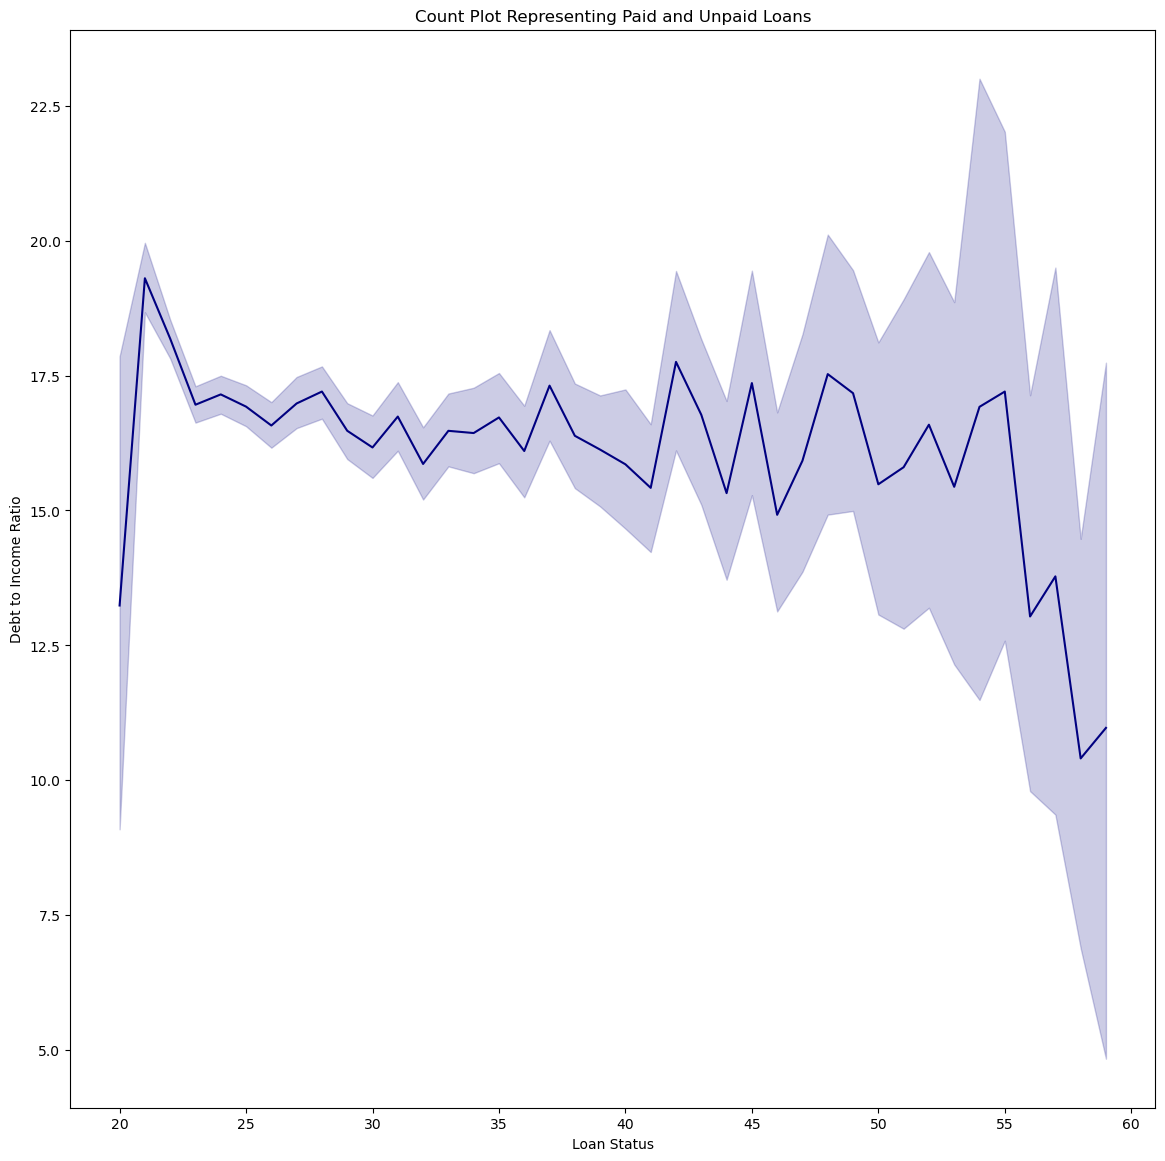

In [163]:
plt.figure(figsize=(14,14))
sns.lineplot(x='person_age',y="debt_to_income_ratio",data=filtered_data_copy,color='r')
plt.title("Count Plot Representing Paid and Unpaid Loans")
plt.xlabel("Loan Status")
plt.ylabel("Debt to Income Ratio")

# One Hot Encoding

In [140]:
# Replace all instances of "Yes" with "1" in column: 'cb_person_default_on_file'
filtered_data['cb_person_default_on_file'] = filtered_data['cb_person_default_on_file'].str.replace("Y", "1", case=False, regex=False)

filtered_data['cb_person_default_on_file'] = filtered_data['cb_person_default_on_file'].str.replace("N", "0", case=False, regex=False)

# Change column type to int8 for column: 'cb_person_default_on_file'
filtered_data = filtered_data.astype({'cb_person_default_on_file': 'int8'})
# One-hot encode column: 'loan_intent'
insert_loc = filtered_data.columns.get_loc('loan_intent')
filtered_data = pd.concat([filtered_data.iloc[:,:insert_loc], pd.get_dummies(filtered_data.loc[:, ['loan_intent']]), filtered_data.iloc[:,insert_loc+1:]], axis=1)


In [141]:
filtered_data.drop(['loan_grade','person_home_ownership',"Age Group","loan_percent_income_category","loan_percent_income"],axis=1,inplace=True)
filtered_data.head()

,person_age,person_income,person_emp_length,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length,debt_to_income_ratio
1,21,9600,5.0,False,True,False,False,False,False,1000,11.14,0,0,2,10.416667
2,25,9600,1.0,False,False,False,True,False,False,5500,12.87,1,0,3,57.291667
3,23,65500,4.0,False,False,False,True,False,False,35000,15.23,1,0,2,53.435115
4,24,54400,8.0,False,False,False,True,False,False,35000,14.27,1,1,4,64.338235
5,21,9900,2.0,False,False,False,False,False,True,2500,7.14,1,0,2,25.252525


# Correlation Analysis

In [156]:
heatmap = filtered_data.corr(method='pearson')['loan_status'].sort_values()

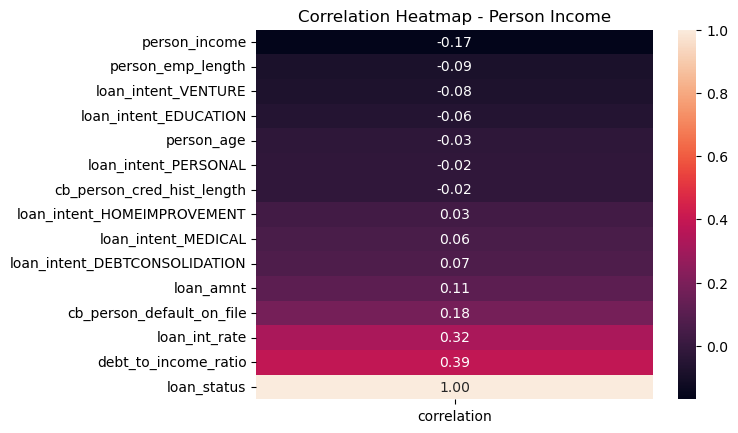

In [157]:


# Create a new DataFrame from the sorted Series
corr_matrix = pd.DataFrame(heatmap.values, index=heatmap.index, columns=['correlation'])

# Create the heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f")  

plt.title("Correlation Heatmap - Person Income")
plt.show()


# Modelling

In [166]:
X = filtered_data.drop("loan_status",axis=1) 

y = filtered_data['loan_status']

In [167]:
y.value_counts()

loan_status
0    24799
1     6801
Name: count, dtype: int64

# Feature Selection

In [168]:
X_train_fs,X_test_fs,y_train_fs,y_test_fs = train_test_split(X,y,test_size=0.2,random_state=42)

In [169]:
rfe = RFE(estimator=DecisionTreeClassifier(),n_features_to_select=5)

In [170]:
rfe.fit(X_train_fs,y_train_fs)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

In [176]:
selected_features = rfe.support_

In [177]:
selected_features

array([ True,  True,  True, False, False, False, False, False, False,
       False,  True, False, False,  True])

In [178]:
print("Selected features:")
for i in range(len(selected_features)):
    if selected_features[i]:
        print(f"Feature {i}")

Selected features:
Feature 0
Feature 1
Feature 2
Feature 10
Feature 13


- Feature 0: ‘person_age’

- Feature 1: ‘person_income’

- Feature 2: ‘person_emp_length’

- Feature 10: ‘loan_int_rate’

- Feature 13: ‘cb_person_cred_hist_length’

# Redefine the columns to be included in the dataset

In [194]:
# Drop columns: 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION' and 6 other columns
train_test_data = filtered_data.drop(columns=['loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'cb_person_default_on_file', 'debt_to_income_ratio'])

In [198]:
X_1 = train_test_data.drop("loan_status",axis=1)
y_1 = train_test_data['loan_status']

# Loan Default is under sampled. Explore undersampling and oversampling

1. What is undersampling?
Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

2. What is Oversampling
Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.


In [199]:
# 1. Random Under-Sampling and Over-Sampling
# Find the shape of the loan_status
defaulted_class = train_test_data[train_test_data['loan_status']==1]

non_default_class = train_test_data[train_test_data['loan_status']==0]

print(f"Defaulted Shape: {defaulted_class.shape}")
print(f"Non-Defaulted Shape: {non_default_class.shape}")



Defaulted Shape: (6801, 7)
Non-Defaulted Shape: (24799, 7)


# NearMiss Under-Sampling Technquie


In [200]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()
x_nm,y_nm = nm.fit_resample(X_1,y_1)

In [201]:
print(f"Defaulted Shape: {defaulted_class.shape}")
print(f"Defaulted Shape: {non_default_class.shape}")
print(f"Resample Dataset Shape:,{y_nm.shape}")
print(f"Resample Dataset Shape:,{x_nm.shape}")

Defaulted Shape: (6801, 7)
Defaulted Shape: (24799, 7)
Resample Dataset Shape:,(13602,)
Resample Dataset Shape:,(13602, 6)


# OverSampling Using Random Over Sampler



In [202]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

x_ros,y_ros = ros.fit_resample(X_1,y_1)

print(x_ros.shape)
print(y_ros.shape)

(49598, 6)
(49598,)


In [203]:
X_train_undersample,X_test_undersample,y_train_undersample,y_test_undersample = train_test_split(x_nm,y_nm,test_size=0.20,random_state=42)

In [204]:
X_train_oversample,X_test_oversample,y_train_oversample,y_test_oversample = train_test_split(x_ros,y_ros,test_size=0.20,random_state=42)

In [205]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [219]:
X_train.shape

(25280, 6)

In [220]:
lgr = LogisticRegression(penalty='l2',C=1.0,fit_intercept=True,class_weight='balanced',solver='liblinear',max_iter=95)
lgr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=95, solver='liblinear')

In [221]:
lgr_1 = LogisticRegression()
lgr_1.fit(X_train_undersample,y_train_undersample)

LogisticRegression()

In [222]:
lgr_2 = LogisticRegression()
lgr_2.fit(X_train_oversample,y_train_oversample)

LogisticRegression()

In [223]:
y_pred2 = lgr_2.predict(X_test_oversample)

In [224]:
y_pred = lgr_1.predict(X_test_undersample)

In [225]:
Y_pred = lgr.predict(X_test)

In [227]:
accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred)
recall = recall_score(y_test, Y_pred)
f1 = f1_score(y_test, Y_pred)
roc_auc = roc_auc_score(y_test, Y_pred)  # Assuming binary classification
print(classification_report(y_test,Y_pred))



              precision    recall  f1-score   support

           0       0.91      0.69      0.78      4982
           1       0.39      0.76      0.52      1338

    accuracy                           0.70      6320
   macro avg       0.65      0.72      0.65      6320
weighted avg       0.80      0.70      0.73      6320



In [228]:
accuracy = accuracy_score(y_test_undersample, y_pred)
precision = precision_score(y_test_undersample, y_pred)
recall = recall_score(y_test_undersample, y_pred)
f1 = f1_score(y_test_undersample, y_pred)
roc_auc = roc_auc_score(y_test_undersample, y_pred)  # Assuming binary classification
print(classification_report(y_test_undersample,y_pred))




              precision    recall  f1-score   support

           0       0.66      0.61      0.64      1328
           1       0.66      0.70      0.68      1393

    accuracy                           0.66      2721
   macro avg       0.66      0.66      0.66      2721
weighted avg       0.66      0.66      0.66      2721



In [229]:
print(classification_report(y_test_oversample,y_pred2))


              precision    recall  f1-score   support

           0       0.75      0.69      0.71      4999
           1       0.70      0.76      0.73      4921

    accuracy                           0.72      9920
   macro avg       0.73      0.72      0.72      9920
weighted avg       0.73      0.72      0.72      9920



# Addressing Class Imbalancing Using SVM 

## What is Support Vector Machine
- Support vector machine (SVM) works by finding the hyperplane that best separates the two classes of data. 

- The hyperplane is a line or a plane that divides the data into two regions, with each region containing all the data points of one class.

In [216]:
from sklearn.svm import SVC

svc_model = SVC(class_weight="balanced",probability=True)

svc_model.fit(X_train,y_train)

svc_predict = svc_model.predict(X_test)

print(classification_report(y_test,svc_predict))


              precision    recall  f1-score   support

           0       0.88      0.79      0.83      4982
           1       0.43      0.60      0.50      1338

    accuracy                           0.75      6320
   macro avg       0.66      0.70      0.67      6320
weighted avg       0.79      0.75      0.76      6320



In [217]:
from sklearn.svm import SVC

svc_model = SVC(class_weight="balanced",probability=True)

svc_model.fit(X_train_undersample,y_train_undersample)

svc_predict = svc_model.predict(X_test_undersample)

print(classification_report(y_test_undersample,svc_predict))


              precision    recall  f1-score   support

           0       0.65      0.80      0.72      1328
           1       0.76      0.60      0.67      1393

    accuracy                           0.70      2721
   macro avg       0.71      0.70      0.69      2721
weighted avg       0.71      0.70      0.69      2721



In [218]:
from sklearn.svm import SVC

svc_model = SVC(class_weight="balanced",probability=True)

svc_model.fit(X_train_oversample,y_train_oversample)

svc_predict = svc_model.predict(X_test_oversample)

print(classification_report(y_test_oversample,svc_predict))


              precision    recall  f1-score   support

           0       0.67      0.80      0.73      4999
           1       0.74      0.59      0.66      4921

    accuracy                           0.70      9920
   macro avg       0.70      0.70      0.69      9920
weighted avg       0.70      0.70      0.69      9920



# Models Evaluation

In [237]:
# Create 3 metric groups for the 3 models
imbalance_model = {"accuracy": 0.7015822784810126,"precision": 0.39388071262587143,"f1-score": 0.5188775510204081} 

undersample_model = {"accuracy": 0.6589489158397648,"precision": 0.6559356136820925,"f1-score": 0.6782246879334258} 

oversample_model = {"accuracy":0.7235887096774194, "precision":0.7047547453486187,"f1-score":0.7322788517867604} 




In [243]:
metrics = {'Imbalanced': imbalance_model, "Undersampled Model": undersample_model,"Oversampled Model": oversample_model}
metrics

{'Imbalanced': {'accuracy': 0.7015822784810126,
  'precision': 0.39388071262587143,
  'f1-score': 0.5188775510204081},
 'Undersampled Model': {'accuracy': 0.6589489158397648,
  'precision': 0.6559356136820925,
  'f1-score': 0.6782246879334258},
 'Oversampled Model': {'accuracy': 0.7235887096774194,
  'precision': 0.7047547453486187,
  'f1-score': 0.7322788517867604}}

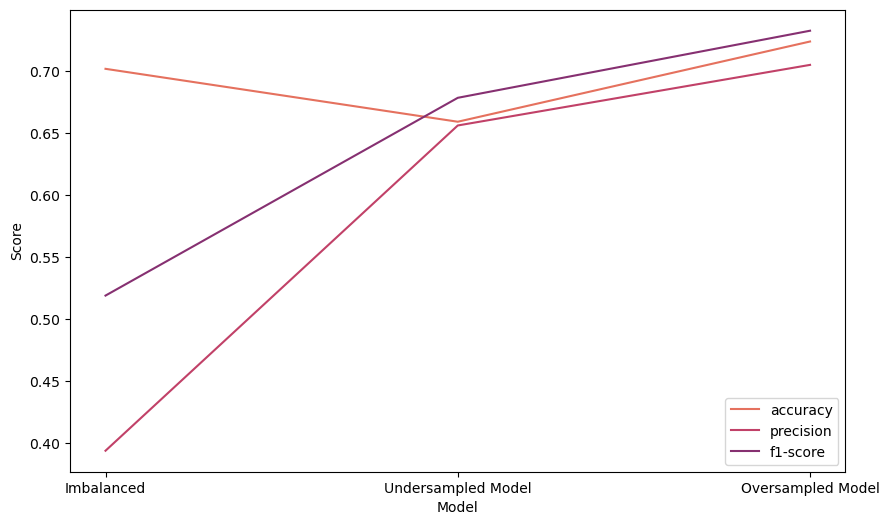

In [249]:
plt.figure(figsize=(10, 6))

# Define the color palette
palette = sns.color_palette("flare", n_colors=3)

# Plot each metric with a different color
for i, metric in enumerate(['accuracy', 'precision', 'f1-score']):
    sns.lineplot(x=list(metrics.keys()), y=[m[metric] for m in metrics.values()], label=metric, color=palette[i])

# Add labels and legend
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend()

# Show the plot
plt.show()

### Best Model is the Oversampled Model

# Random Forest Algorithm

In [253]:
rfc = RandomForestClassifier()

In [254]:
param_grid = {
    'n_estimators':[150,250,350],
    'max_depth': [5,15,20],
    'min_samples_split':[2,5,10]
}

In [257]:
cross_vald = KFold(n_splits=5,shuffle = True, random_state=42)

grid_search = GridSearchCV(estimator = rfc, param_grid=param_grid, cv=cross_vald, scoring='precision')

In [258]:
grid_search.fit(X_train_oversample,y_train_oversample)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 15, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [150, 250, 350]},
             scoring='precision')

In [259]:
# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
Best score: 0.9112416549117521


In [264]:
# Use the best model for prediction
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_oversample)

In [265]:
print(classification_report(y_test_oversample,predictions))


              precision    recall  f1-score   support

           0       0.98      0.91      0.95      4999
           1       0.92      0.98      0.95      4921

    accuracy                           0.95      9920
   macro avg       0.95      0.95      0.95      9920
weighted avg       0.95      0.95      0.95      9920



## Decision Tree 

AttributeError: 'DataFrame' object has no attribute 'target_names'

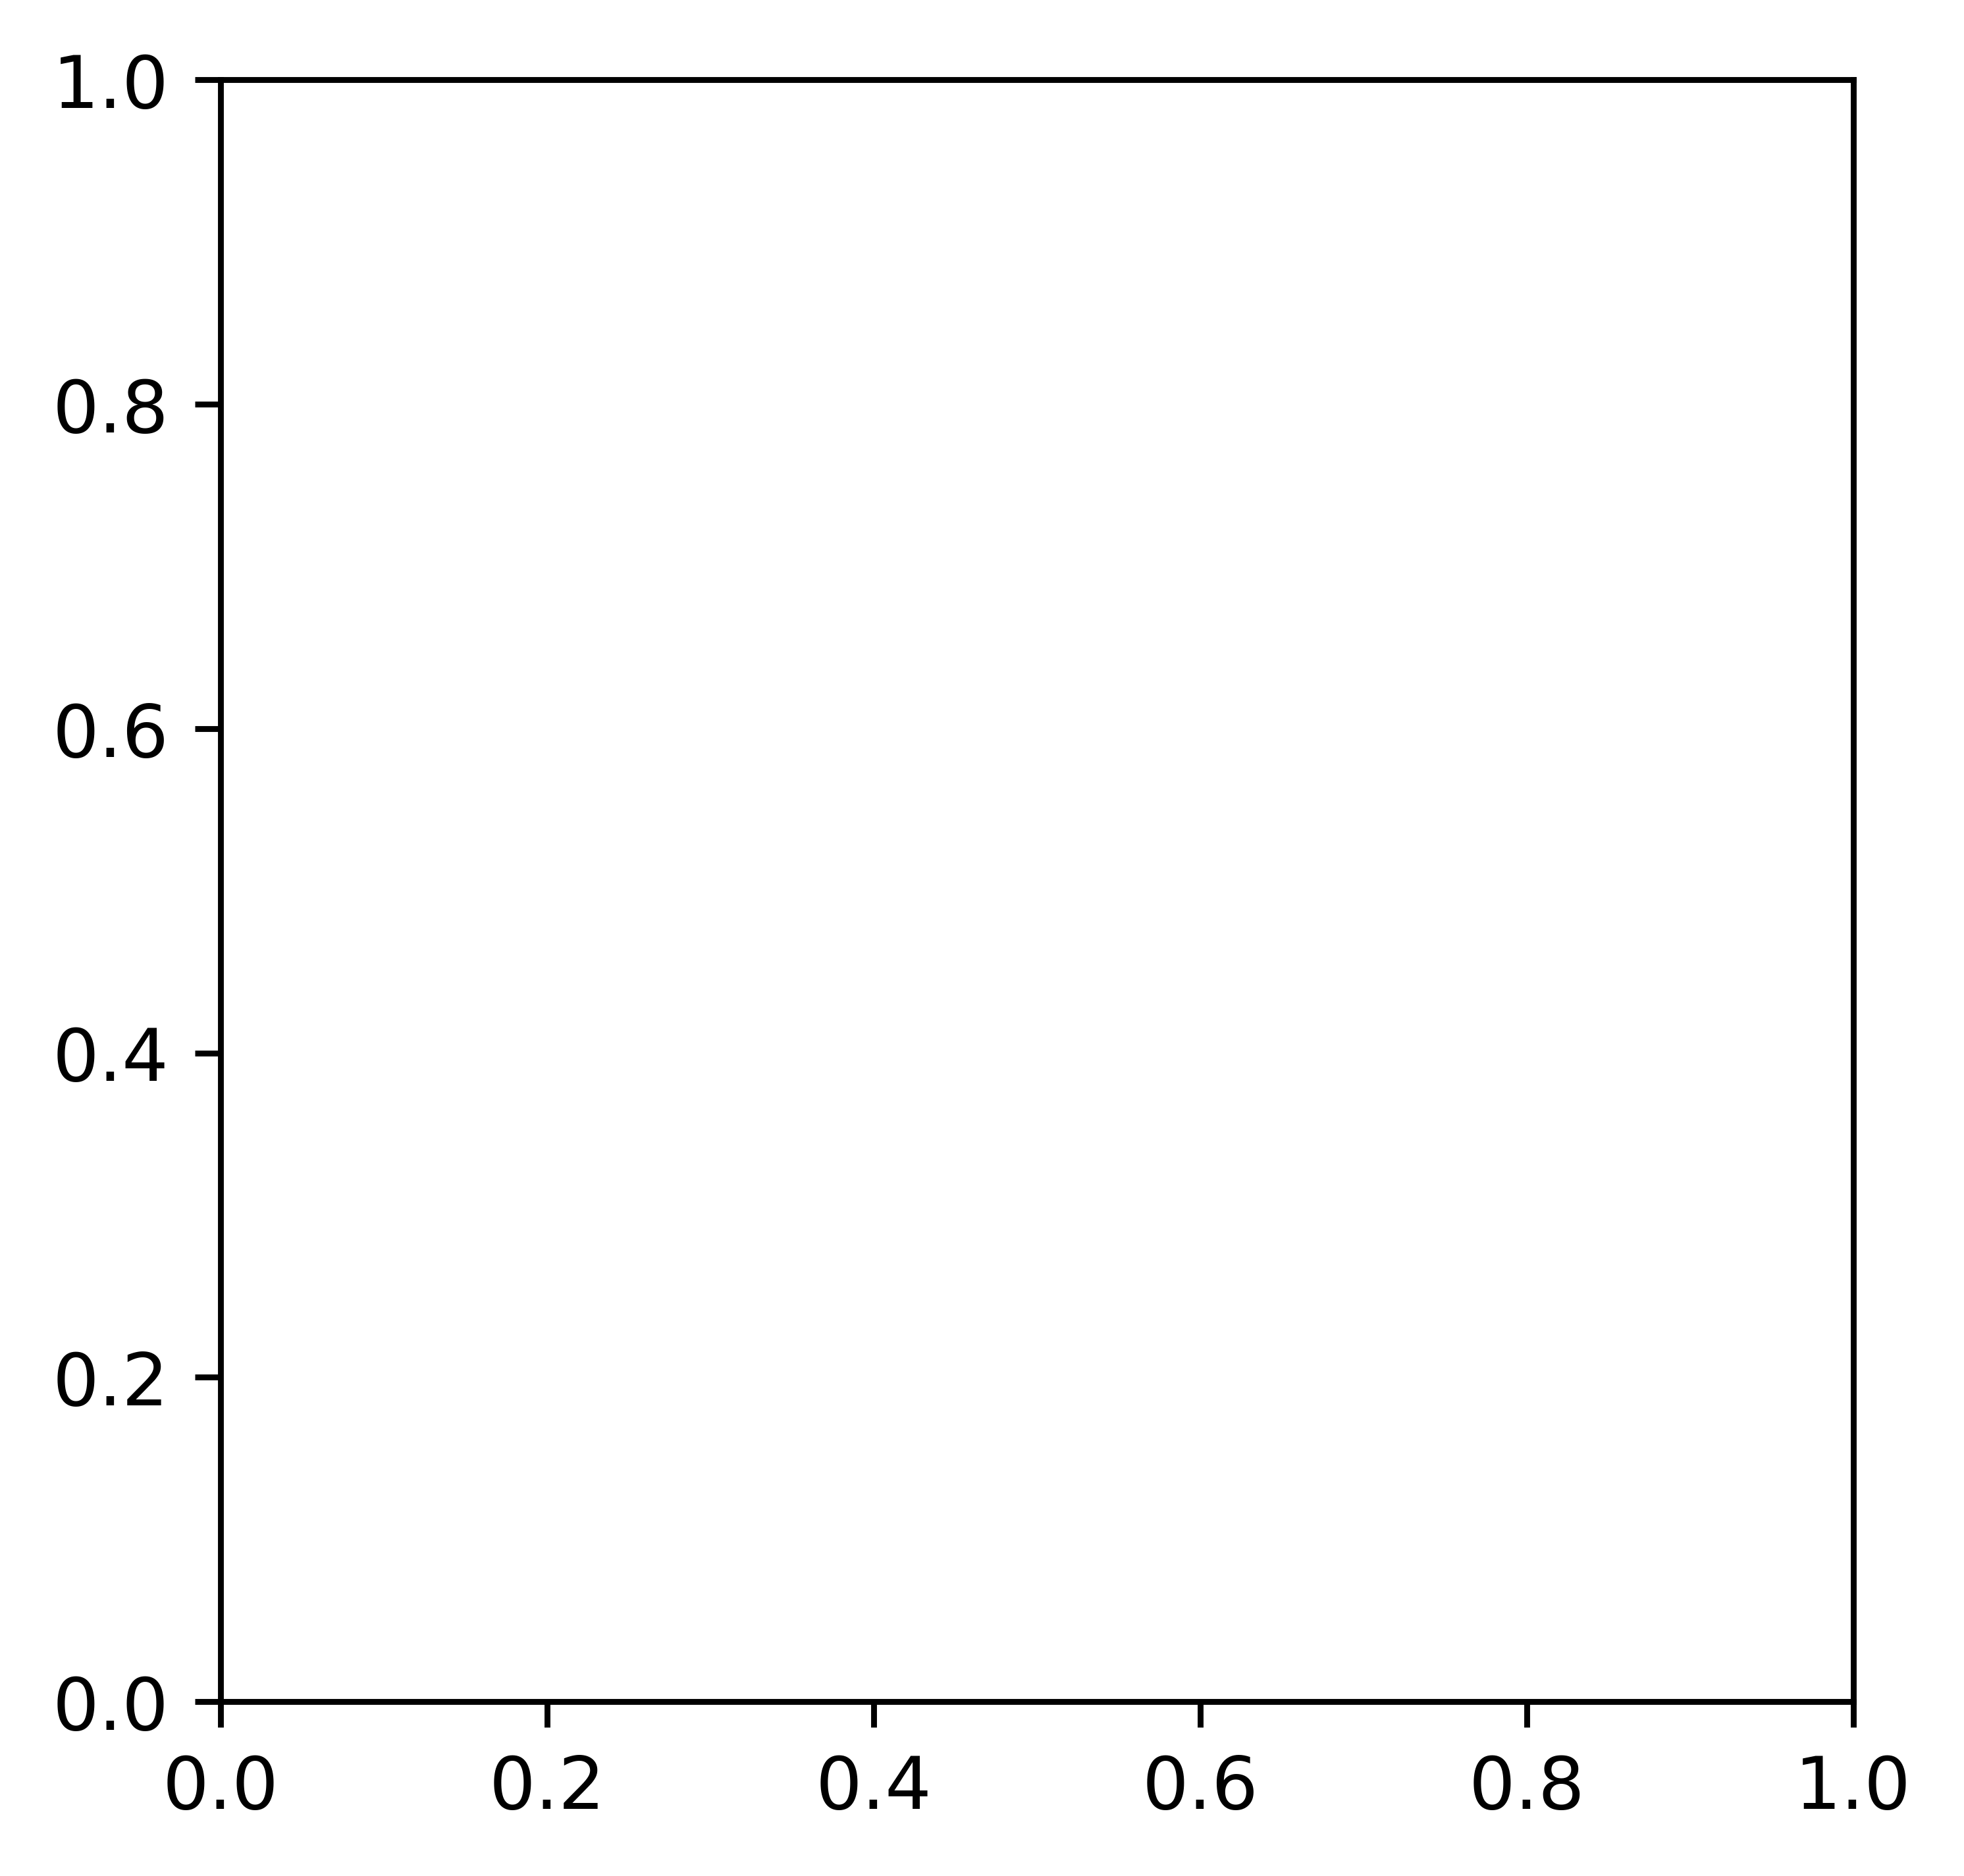

In [268]:
estimator = best_model[0]
# Visualize the decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(estimator,
                feature_names=train_test_data.columns,  # Use columns instead of feature_names
                class_names=train_test_data.target_names,
                filled = True);
